<a href="https://colab.research.google.com/github/PhanDuyNhat/AI/blob/Code_AI/week6(homeworkw5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONTROL DC SERVO

<ipython-input-58-17a11bb39d79>:91: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= 9, cmap= 'jet', anpha= 0.5)
<ipython-input-58-17a11bb39d79>:92: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= 11, cmap= 'jet', anpha= 0.5)
<ipython-input-58-17a11bb39d79>:93: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= 11, cmap= 'jet', anpha= 0.5)


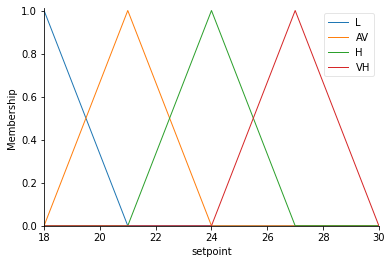

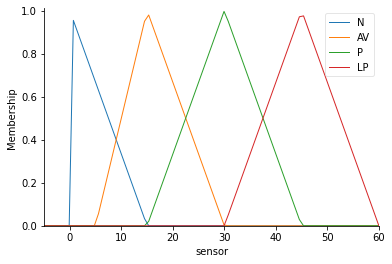

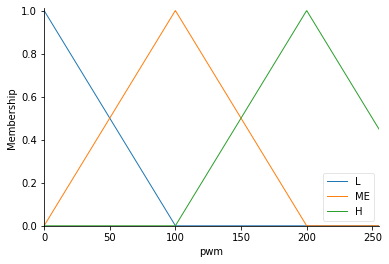

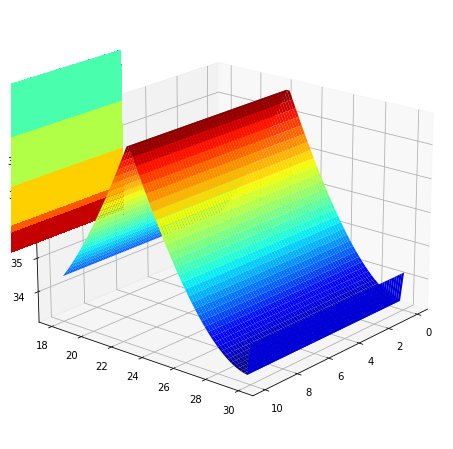

In [58]:

import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

universe = np.linspace(18,30,81)
universe1 = np.linspace(-5,60,81) 
universe2 = np.linspace(0,255,1000) 

#Khai báo các biến vào-ra
setpoint = ctrl.Antecedent(universe,'setpoint')
sensor = ctrl.Antecedent(universe1,'sensor')
pwm = ctrl.Consequent(universe2,'pwm')
name1 = ['L', 'AV', 'H', 'VH']   
name2 = ['N', 'AV', 'P', 'LP']   
name3 = ['L', 'ME', 'H']   

setpoint .automf(names = name1)
sensor .automf(names = name2)
pwm.automf(names = name3)

setpoint['L'] = fuzzy.trimf(setpoint.universe,[18,18,21])
setpoint['AV'] = fuzzy.trimf(setpoint.universe,[18,21,24])
setpoint['H']  = fuzzy.trimf(setpoint.universe,[21,24,27])
setpoint['VH']  = fuzzy.trimf(setpoint.universe,[24,27,30])
setpoint.view()

sensor['N'] = fuzzy.trimf(sensor.universe,[0,0,15])
sensor['AV'] = fuzzy.trimf(sensor.universe,[5,15,30])
sensor['P']  = fuzzy.trimf(sensor.universe,[15,30,45])
sensor['LP'] = fuzzy.trimf(sensor.universe,[30,45,60])
sensor.view()

pwm['L'] = fuzzy.trimf(pwm.universe,[0,0,100])
pwm['ME'] = fuzzy.trimf(pwm.universe,[0,100,200])
pwm['H']  = fuzzy.trimf(pwm.universe,[100,200,300])
pwm.view()
#Rule
rule1 = ctrl.Rule(antecedent=((setpoint['L']&sensor['P'])|
                              (setpoint['L']&sensor['AV'])|
                              (setpoint['L']&sensor['N'])|
                              (setpoint['AV']&sensor['N'])|
                              (setpoint['H']&sensor['N']))
                              ,consequent=(pwm['L']))

rule2 = ctrl.Rule(antecedent=((setpoint['L']&sensor['LP'])|
                              (setpoint['AV']&sensor['P'])|
                              (setpoint['AV']&sensor['AV'])|
                              (setpoint['H']&sensor['P'])|
                              (setpoint['H']&sensor['AV'])|
                              (setpoint['VH']&sensor['N']))
                              ,consequent=(pwm['ME']))

rule3 = ctrl.Rule(antecedent=((setpoint['AV']&sensor['LP'])|
                              (setpoint['H']&sensor['LP'])|
                              (setpoint['VH']&sensor['LP'])|
                              (setpoint['VH']&sensor['P'])|
                              (setpoint['VH']&sensor['AV']))
                              ,consequent=(pwm['H']))


#Thêm Thư Viện 
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


System  = ctrl.ControlSystem(rules = [rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)

#Khai báo dữ liệu
upSampled1 = np.linspace(18,30,61)
upSampled2 = np.linspace(0,10,61)
x,y = np.meshgrid(upSampled2, upSampled1)
z = np.zeros_like(x)
#Tính toán
for i in range(61):
  for j in range(61):
    sim.input['setpoint']= x[i,j]
    sim.input['sensor']= y[i,j]
    sim.compute()
    z[i,j]=sim.output['pwm']

#Hiển Thị Kết Quả
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'jet',linewidth= 0.4, antialiased= True)

#Chiếu 3 hình chiếu
cset = ax.contourf(x,y,z, zdir= 'z', offset= 9, cmap= 'jet', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= 11, cmap= 'jet', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= 11, cmap= 'jet', anpha= 0.5)
ax.view_init(20,400)

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=060d50acaba758a3dad1697b4087f8b3e07447e09a867185401920ad127b168c
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
